In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import simple_continuous_buy_sell_spy

In [3]:
env = simple_continuous_buy_sell_spy.simple_continuous_buy_sell_spy()

In [4]:
df = env.index_feature_dataframe

In [5]:
df

,index_raw_price,ewm_5,ewm_15,ewm_50
0,26.635313,0.664980,0.642980,0.720856
1,26.598322,0.349506,0.439969,0.554796
2,26.598322,0.232733,0.384714,0.529941
3,26.598322,0.155035,0.336428,0.506332
4,26.487343,-0.175389,-0.071940,0.083140
...,...,...,...,...
7063,420.059998,0.541435,1.494138,4.752854
7064,417.299988,-0.079481,0.723113,3.898964
7065,418.200012,0.090643,0.821841,3.954968
7066,415.619995,-0.351851,0.174813,3.179557


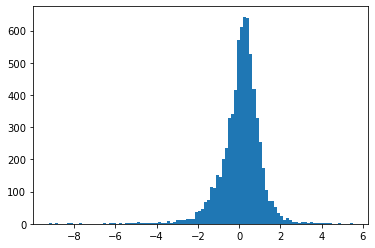

In [6]:
plt.hist(df['ewm_5'],bins = 100)
plt.show()

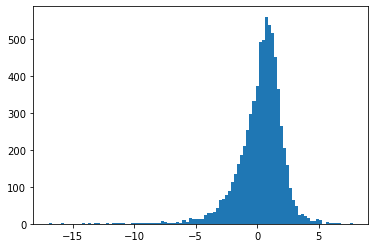

In [7]:
plt.hist(df['ewm_15'],bins = 100)
plt.show()

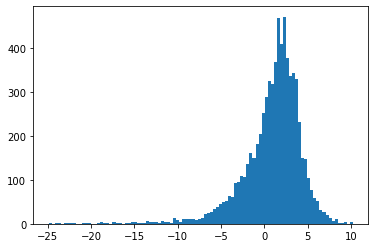

In [8]:
plt.hist(df['ewm_50'],bins = 100)
plt.show()

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
df.isnull().values.any()

False

In [11]:
env.reset()

array([[-0.37649814],
       [-0.03877486],
       [ 2.35616924],
       [ 0.        ]])

In [12]:
current_feature = env.reset()
print(current_feature)

[[1.60287115]
 [2.81160461]
 [5.41018481]
 [0.        ]]


In [30]:
from scipy.special import expit
import pandas as pd
current_feature = np.transpose(current_feature)
logistic_transform = expit(current_feature)
holding_position = np.reshape(current_feature[:,-1],(1,1))
data_point_for_df = np.concatenate((logistic_transform[:,:-1],holding_position),axis = 1)
data_point_for_copula = pd.DataFrame(data_point_for_df)
data_point_for_copula

,0,1,2,3
0,0.832419,0.9433,0.995549,0.0


In [17]:
type(logistic_transform)

numpy.ndarray

In [18]:
logistic_transform.shape

(1, 4)

In [20]:
logistic_transform[:,:-1].shape

(1, 3)

In [26]:
current_feature[:,-1].shape

(1,)

In [34]:
free_parameters = {'cov_para_1': -0.1613112151622772, 'cov_para_2': -0.8676685351878405, 'cov_para_3': -0.5514910072088242, 'beta_1a': 8.532856702804565, 'beta_1b': 5.741763710975647, 'beta_2a': 10.587245225906372, 'beta_2b': 9.560279250144958, 'beta_3a': 13.055520057678223, 'beta_3b': 17.514920234680176}

In [43]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

lower_triangular_matrix = np.asarray([[diag_1,0,0],
                        [free_para1,diag_2,0],
                        [free_para2,free_para3,diag_3]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()

/home/zuhao/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [44]:
diag_1

1

In [45]:
diag_2

0.9869035879268397

In [46]:
diag_3

nan

In [47]:
free_para2

-0.8676685351878405

In [48]:
free_para3

-0.5514910072088242

In [49]:
1-free_para2**2-free_para3**2

-0.056991017987216064